This file is contains a factorial experiment for analyzing how much each factors affect result including crossover rate, mutation rate, elite percentage, worker size, job_size, preference size 

In [ ]:
from GeneticAlgorithmOptimized import GA
from randomize_data import randomize_ja_data
import matplotlib.pyplot as plt
from time import perf_counter
from datetime import datetime

import csv # for saving result

In [ ]:
# Define factors and their levels
worker_size = {-1:30, 1:100}
job_size = {-1:30, 1:100}
preferences_size = 30
crossover_rate = {-1:0.3, 1:0.8}
mutation_rate = {-1:0.3, 1:0.8}
elite_percentage = {-1:0.2, 1:0.8}

results = []
for w in worker_size:
    for j in job_size:
        worker_data, job_data = randomize_ja_data(worker_size[w], job_size[j], preferences_size)
        for c in crossover_rate:
            for m in mutation_rate:
                for e in elite_percentage:
                    print(w, j, c, m ,e)
                    start = perf_counter()
                    best_solution, average_fitness, average_objective, result_bestIngen, best_solution_gen = GA(worker_data, job_data, crossover_rate[c], mutation_rate[m], elite_percentage[e], 10, 1000)
                    end = perf_counter()
                    results.append({
                                "worker_size": f"{w}({worker_size[w]})",
                                "job_size": f"{j}({job_size[j]})",
                                "crossover_rate": f"{c}({crossover_rate[c]})",
                                "mutation_rate": f"{m}({mutation_rate[m]})",
                                "elite_percentage": f"{e}({elite_percentage[e]})",
                                "execution_time": end-start,  
                                "final_fitness": average_fitness[-1],
                                "average_fitness": average_fitness
                    })
with open(f"./factorial_design_result/ga_experiment_results{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv", "w+", newline="") as csvfile:
    fieldnames = results[0].keys()  # Extract field names from the first result
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)



In [ ]:
# Define factors and their levels
data_size = [50, 100, 150, 200]
preferences_size = 30
crossover_rate = {-1:0.3, 1:0.8}
mutation_rate = {-1:0.3, 1:0.8}
elite_percentage = {-1:0.2, 1:0.8}

resultsA = []
resultsB = []
for size in data_size:
    worker_data, job_data = randomize_ja_data(size, size, preferences_size)
    for c in crossover_rate:
        for m in mutation_rate:
            for e in elite_percentage:
                print(f"data size : {size}, param {c, m, e}")
                start = perf_counter()
                best_solution, average_fitness, average_objective, result_bestIngen, best_solution_gen = GA(worker_data, job_data, crossover_rate[c], mutation_rate[m], elite_percentage[e], 10, 1000)
                end = perf_counter()
                resultsA.append({
                            "data_size": size,
                            "crossover_rate": f"{c}",
                            "mutation_rate": f"{m}",
                            "elite_percentage": f"{e}",
                            "execution_time": end-start,  
                            "final_fitness": average_fitness[-1]
                })
                resultsB.append({
                            "data_size": size,
                            "crossover_rate": f"{crossover_rate[c]}",
                            "mutation_rate": f"{mutation_rate[m]}",
                            "elite_percentage": f"{elite_percentage[e]}",
                            "execution_time": end-start,  
                            "final_fitness": average_fitness[-1]
                })
with open(f"./factorial_design_result/ga_experiment_results(A).csv", "w+", newline="") as csvfile:
    fieldnames = resultsA[0].keys()  # Extract field names from the first result
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(resultsA)
with open(f"./factorial_design_result/ga_experiment_results(B).csv", "w+", newline="") as csvfile:
    fieldnames = resultsB[0].keys()  # Extract field names from the first result
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(resultsB)



In [7]:
# Define factors and their levels
# using actual value instead of -1 and 1 to increase the factor level
data_size = [50, 100, 150, 200]
preferences_size = 30
crossover_rate = [i/10 for i in range(3, 9)]
mutation_rate = [i/10 for i in range(3, 9)]
elite_percentage = [i/10 for i in range(3, 9)]

resultsA = []
resultsB = []
for size in data_size:
    worker_data, job_data = randomize_ja_data(size, size, preferences_size)
    for c in crossover_rate:
        for m in mutation_rate:
            for e in elite_percentage:
                print(f"data size : {size}, param {c, m, e}")
                start = perf_counter()
                best_solution, average_fitness, average_objective, result_bestIngen, best_solution_gen = GA(worker_data, job_data, c, m, e, 10, 1000, False)
                end = perf_counter()
                resultsA.append({
                            "data_size": size,
                            "crossover_rate": f"{c}",
                            "mutation_rate": f"{m}",
                            "elite_percentage": f"{e}",
                            "execution_time": end-start,  
                            "final_fitness": average_fitness[-1]
                })
with open(f"./factorial_design_result/ga_experiment_results(A).csv", "w+", newline="") as csvfile:
    fieldnames = resultsA[0].keys()  # Extract field names from the first result
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(resultsA)



data size : 50, param (0.3, 0.3, 0.3)
data size : 50, param (0.3, 0.3, 0.4)
data size : 50, param (0.3, 0.3, 0.5)
data size : 50, param (0.3, 0.3, 0.6)
data size : 50, param (0.3, 0.3, 0.7)
data size : 50, param (0.3, 0.3, 0.8)
data size : 50, param (0.3, 0.4, 0.3)
data size : 50, param (0.3, 0.4, 0.4)
data size : 50, param (0.3, 0.4, 0.5)
data size : 50, param (0.3, 0.4, 0.6)
data size : 50, param (0.3, 0.4, 0.7)
data size : 50, param (0.3, 0.4, 0.8)
data size : 50, param (0.3, 0.5, 0.3)
data size : 50, param (0.3, 0.5, 0.4)
data size : 50, param (0.3, 0.5, 0.5)
data size : 50, param (0.3, 0.5, 0.6)
data size : 50, param (0.3, 0.5, 0.7)
data size : 50, param (0.3, 0.5, 0.8)
data size : 50, param (0.3, 0.6, 0.3)
data size : 50, param (0.3, 0.6, 0.4)
data size : 50, param (0.3, 0.6, 0.5)
data size : 50, param (0.3, 0.6, 0.6)
data size : 50, param (0.3, 0.6, 0.7)
data size : 50, param (0.3, 0.6, 0.8)
data size : 50, param (0.3, 0.7, 0.3)
data size : 50, param (0.3, 0.7, 0.4)
data size : 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(f"./factorial_design_result/ga_experiment_results(A).csv")
data_size = [50, 100, 150, 200]
factors = ["crossover_rate", "mutation_rate", "elite_percentage"]

In [ ]:
fig, axes = plt.subplots(len(factors), 4, figsize=(15, 15))
extra_spaces = 0.05
for i, factor in enumerate(factors):
    # Calculate means for each factor level combination
    means = df.groupby(["data_size", factor])[['final_fitness']].mean().unstack()
    means.columns = means.columns.droplevel()
    min_fitness = means.min().min()
    max_fitness = means.max().max()
    # Create subplots

    # Iterate over data_size
    for j, size in enumerate(data_size):
        # Plot the mean final fitness for each mutation rate
        means.loc[size].plot(kind='line', marker='o', ax=axes[i, j])
        # Set title
        axes[i, j].set_title(f'Data Size: {size}')
        axes[i, j].set_ylim(min_fitness - (min_fitness/50), max_fitness + (max_fitness/50))   # Example limits for final fitness
        axes[i, j].grid()
        # Set x label
        axes[i, j].set_xlabel(factor.capitalize().replace("_", " "))
        axes[i, j].set_ylabel('Final Fitness')
        axes[i, j].set_xticks([-1, 1])
    if j == 3:
        axes[i, 0].text(-2, max_fitness + max_fitness/25, f"Main Effect: {factor.capitalize().replace("_", " ")}", fontsize=14, ha='center', va='bottom')


plt.tight_layout()
plt.show()

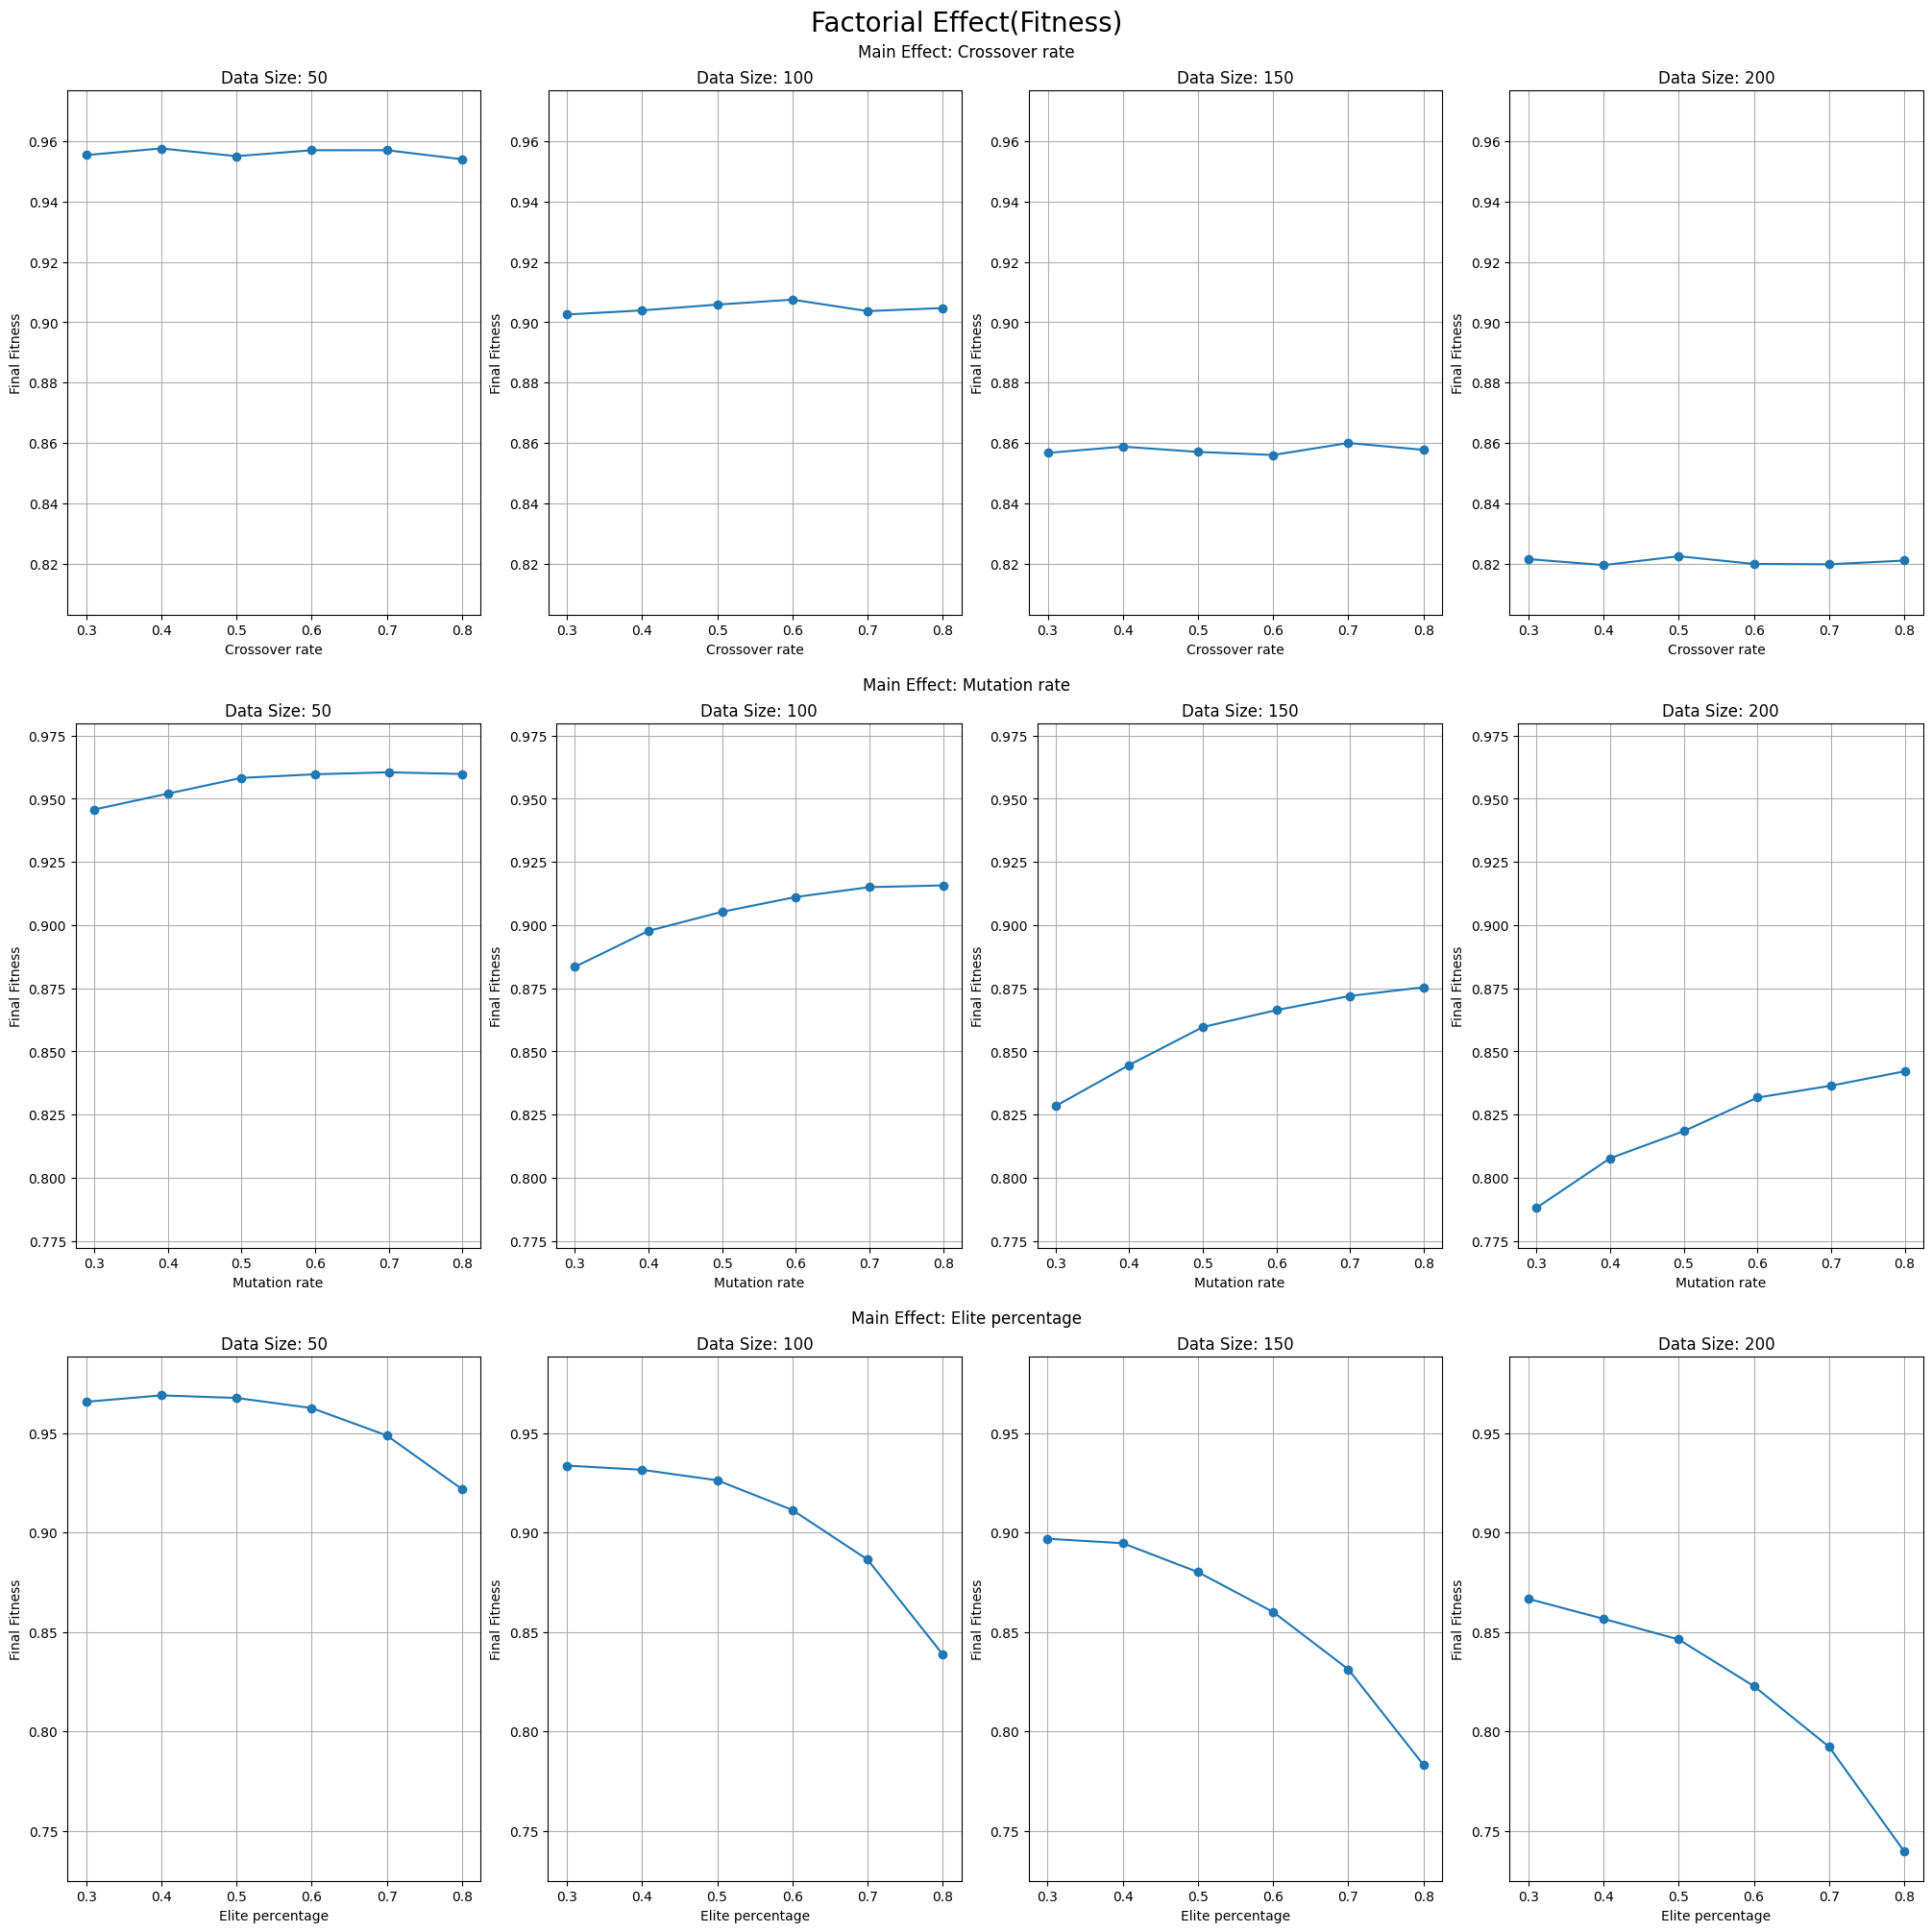

In [11]:
# Using Subfig(Fitness)
fig = plt.figure(constrained_layout=True, figsize=(20, 20))
fig.suptitle('Factorial Effect(Fitness)', size=20)

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
for subfig, factor in zip(subfigs, factors):
    subfig.suptitle(f'Main Effect: {factor.capitalize().replace("_", " ")}')
    means = df.groupby(["data_size", factor])[['final_fitness']].mean().unstack()
    means.columns = means.columns.droplevel()
    min_fitness = means.min().min()
    max_fitness = means.max().max()

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)
    for ax, size in zip(axs, data_size):
        means.loc[size].plot(kind='line', marker='o', ax=ax)
        ax.set_title(f'Plot title {size}')
        ax.set_title(f'Data Size: {size}')
        ax.set_ylim(min_fitness - (min_fitness/50), max_fitness + (max_fitness/50))   # Example limits for final fitness
        ax.grid()
        # Set x label
        ax.set_xlabel(factor.capitalize().replace("_", " "))
        ax.set_ylabel('Final Fitness')

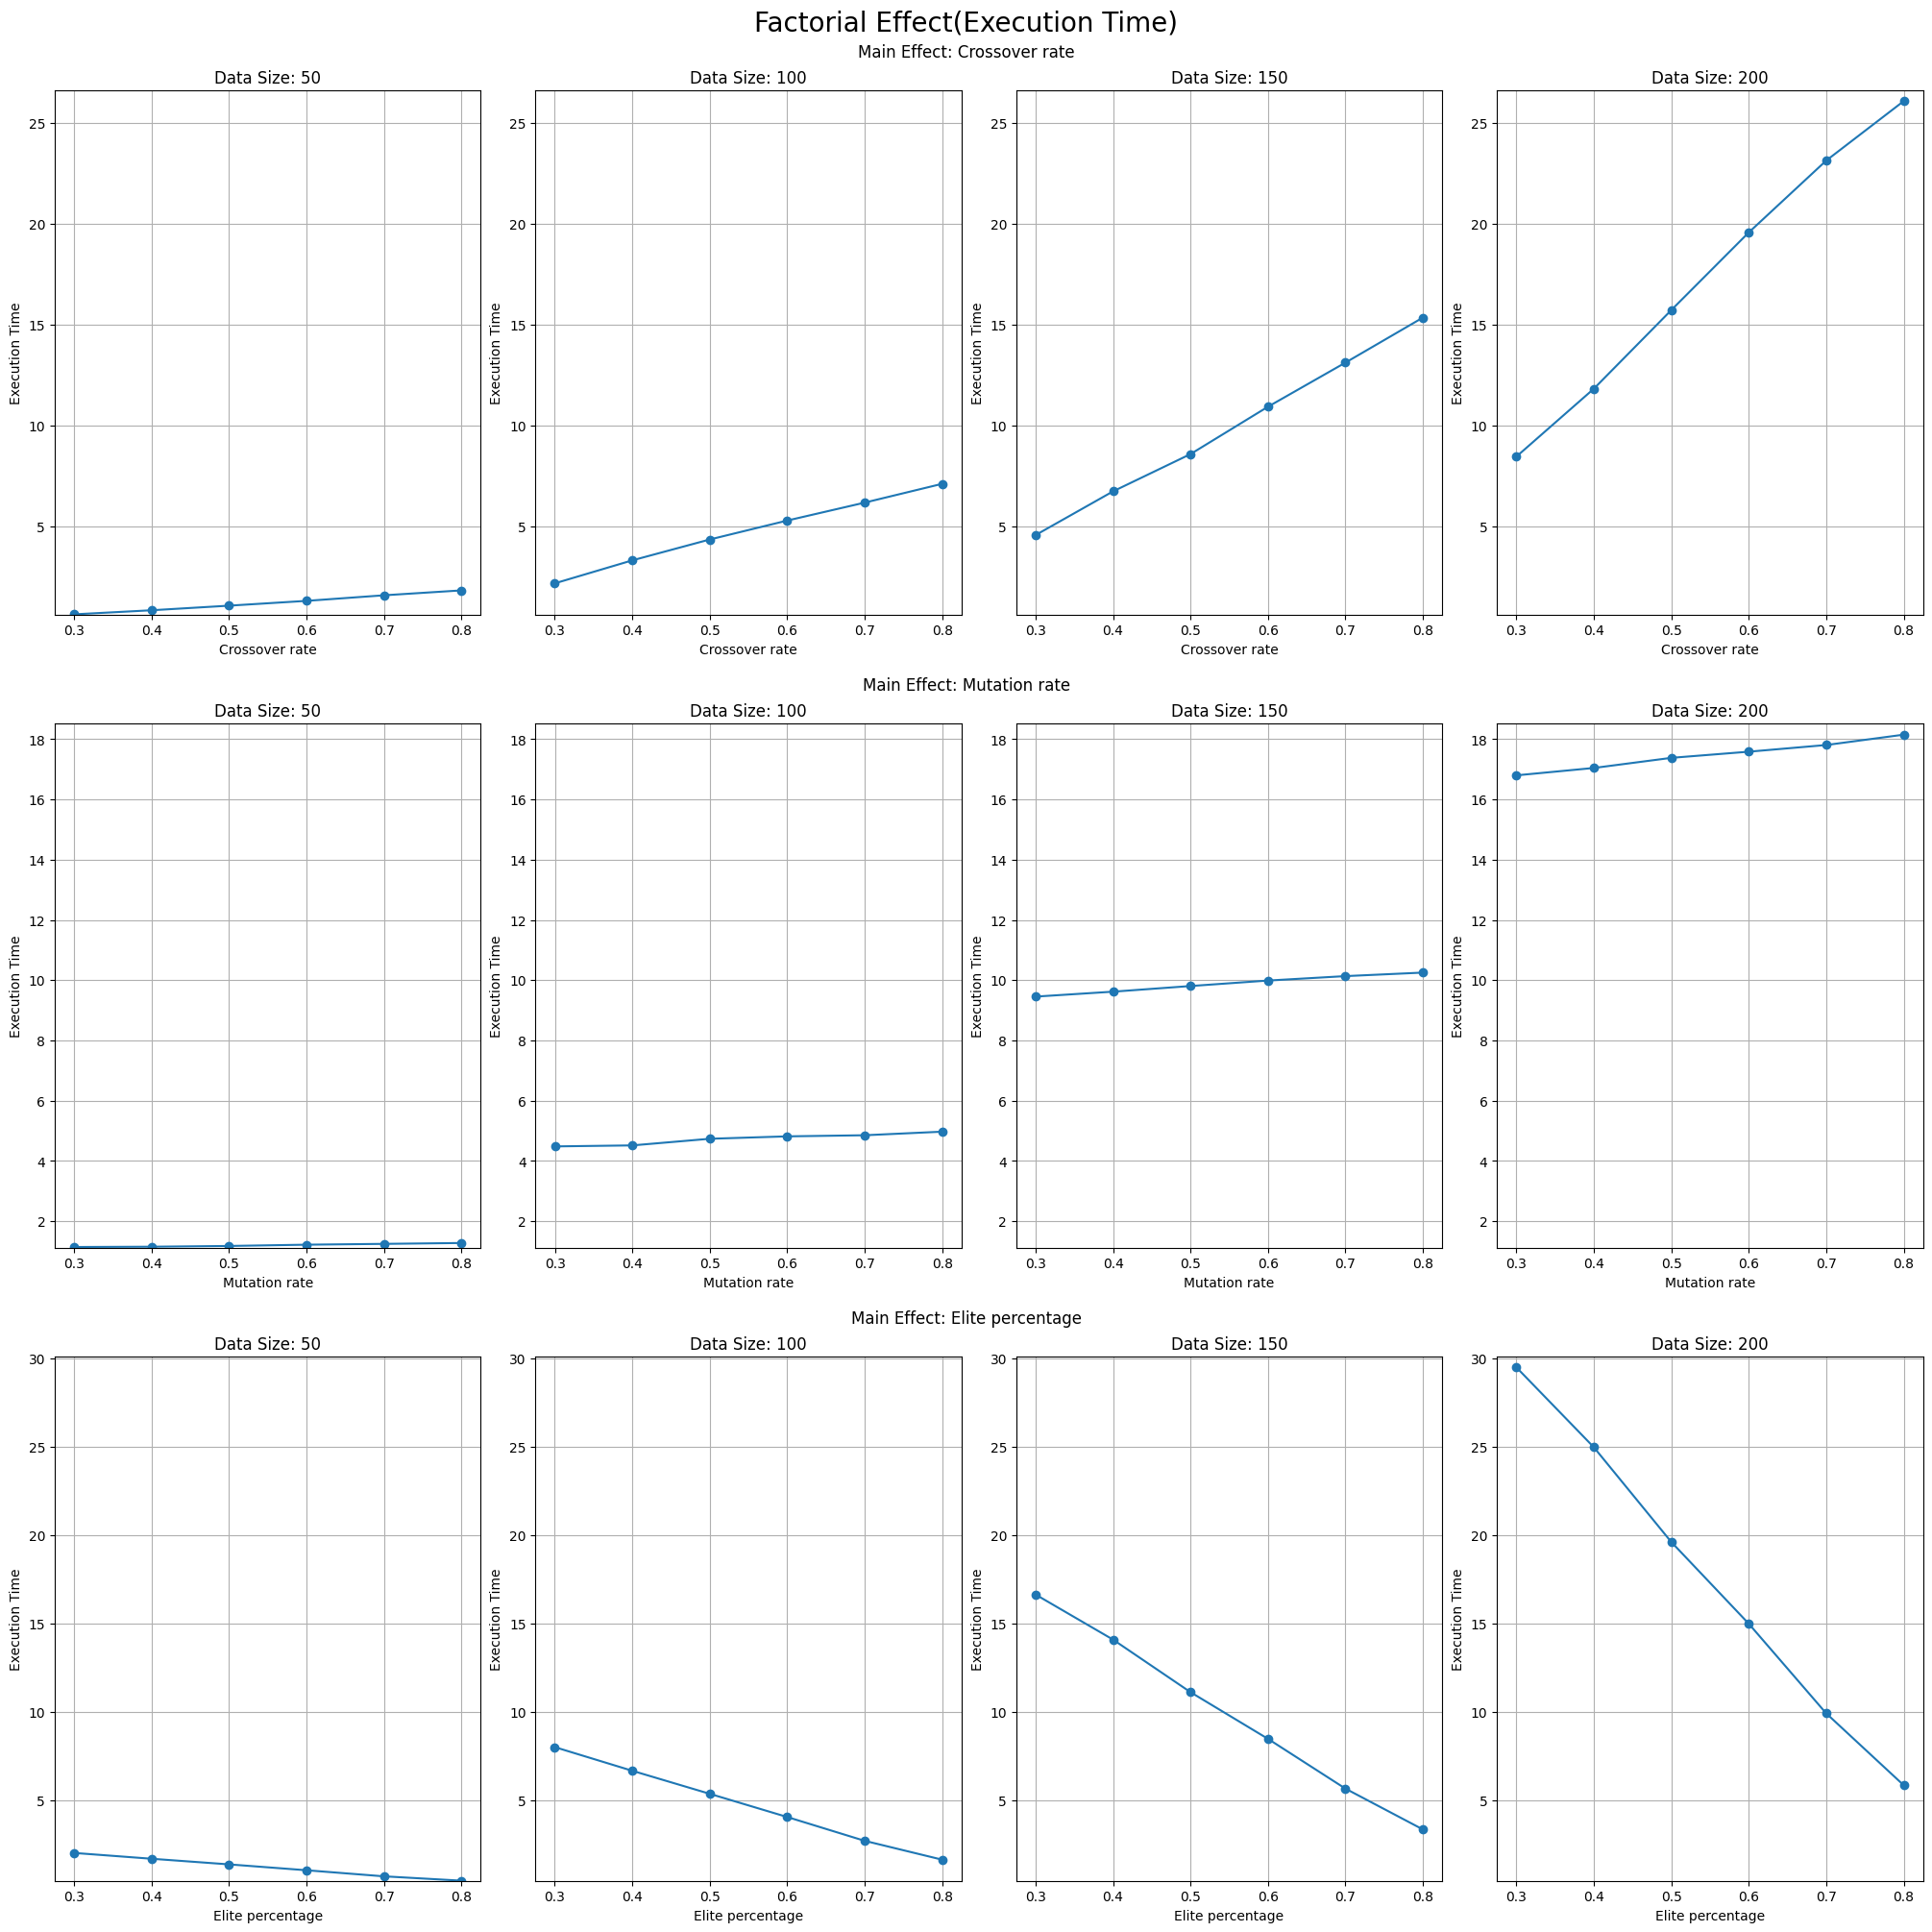

In [9]:
# Using Subfig(Time)
fig = plt.figure(constrained_layout=True, figsize=(20, 20))
fig.suptitle('Factorial Effect(Execution Time)', size=20)

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
for subfig, factor in zip(subfigs, factors):
    subfig.suptitle(f'Main Effect: {factor.capitalize().replace("_", " ")}')
    means = df.groupby(["data_size", factor])[['execution_time']].mean().unstack()
    # print(means)
    means.columns = means.columns.droplevel()
    min_fitness = means.min().min()
    max_fitness = means.max().max()

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)
    for ax, size in zip(axs, data_size):
        means.loc[size].plot(kind='line', marker='o', ax=ax)
        ax.set_title(f'Plot title {size}')
        ax.set_title(f'Data Size: {size}')
        ax.set_ylim(min_fitness - (min_fitness/50), max_fitness + (max_fitness/50))   # Example limits for final fitness
        ax.grid()
        # Set x label
        ax.set_xlabel(factor.capitalize().replace("_", " "))
        ax.set_ylabel('Execution Time')